In [1]:
from ultralytics import YOLO
import torch

import os

import cv2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_images(images, labels=None, row=None, col=None):
    
    '''
    Plot grid of images.
    
    Parameters:
    - images (list of numpy array): images to be plotted
    - labels (list of string, optional): labels for each image. Default is None
    - row (int, optional): number of rows in image grid.
    - col (int, optional): number of columns in image grid.
    '''
    
    # calculate the number of rows and columns in the grid
    l = len(images)
    if row is None or col is None:
        row = int(l ** (1/2))
        col = int(np.ceil(l / row))
    else:
        assert row * col >= l
    
    # plotting the images
    for i in range(l):
        plt.subplot(row, col, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        if labels is not None:
            plt.title(labels[i])

In [3]:
def load_data(n=10):
    
    """
    Loads image and label data from the test dataset.

    Args:
        n (int): Number of images to load. Defaults to 10.

    Returns:
        tuple: A tuple containing a list of loaded images and a list of corresponding labels.
    """
    
    img_dir = "./datasets/images/test/"
    label_dir = "./datasets/labels/test/"
    
    image_path = os.listdir(img_dir)
    
    images = []
    labels = []
    
    for img in image_path[:n]:
        img_name = img.split(".")[0]
        
        images.append(cv2.imread(os.path.join(img_dir, img)))
        
        with open(os.path.join(label_dir, img_name + ".txt")) as file:
            line = file.readline()
            
            labels.append(line.split(" ")[1:])
    
    return images, labels

In [4]:
def draw_bounding_box(image, faces, color=(0,255,0)):
    
    """
    Draws bounding boxes around detected faces on the image.

    Args:
        image (numpy.ndarray): The input image on which to draw bounding boxes.
        faces (list of tuples): A list of tuples, each representing a detected face. 
                                Each tuple contains (x, y, w, h) where
                                (x, y) is the top-left corner of the bounding box,
                                w is the width, and h is the height.
        color (tuple): Optional. The color of the bounding box in BGR format. Defaults to (0, 255, 0) (green).

    Returns:
        numpy.ndarray: A copy of the input image with bounding boxes drawn around the faces.
    """
    
    image_copy = image.copy()
    
    for face in faces:        
        (x, y, w, h) = face
        cv2.rectangle(image_copy, (x, y), (w, h), color, 1)
    
    return image_copy

In [5]:
# load the yolo model
model = YOLO("yolov8n.pt")

In [6]:
# train the model
model.train(data="training_config.yaml", epochs=50, imgsz=306, pretrained=True, batch=64, patience=2)

Ultralytics YOLOv8.2.28 🚀 Python-3.9.0 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 3904MiB)
engine/trainer: task=detect, mode=train, model=yolov8n_face.pt, data=training_config.yaml, epochs=50, time=None, patience=2, batch=64, imgsz=306, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

/home/rolexx/anaconda3/envs/project/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/rolexx/anaconda3/envs/project/lib/python3.9/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅
WARNING ⚠️ imgsz=[306] must be multiple of max stride 32, updating to [320]


train: Scanning /media/rolexx/Local Disk/gritfeat/computer vision/object localization/datasets/labels/train.cache... 1501 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1501/1501 [00:00<?, ?it/s]
val: Scanning /media/rolexx/Local Disk/gritfeat/computer vision/object localization/datasets/labels/test.cache... 359 images, 0 backgrounds, 0 corrupt: 100%|██████████| 359/359 [00:00<?, ?it/s]


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 8 dataloader workers
Logging results to runs/detect/train7
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.28G       1.63     0.8229      1.581         50        320: 100%|██████████| 24/24 [00:26<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.02it/s]

                   all        359        359      0.961      0.708      0.709      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.25G      1.135     0.6466       1.23         50        320: 100%|██████████| 24/24 [00:29<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.02s/it]

                   all        359        359      0.966       0.71      0.704      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.26G      1.072     0.6354      1.206         69        320: 100%|██████████| 24/24 [00:28<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.04s/it]

                   all        359        359      0.924       0.54       0.56       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.26G      1.049     0.6493      1.202         66        320: 100%|██████████| 24/24 [00:30<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.09s/it]

                   all        359        359       0.93      0.646       0.67      0.402
EarlyStopping: Training stopped early as no improvement observed in last 2 epochs. Best results observed at epoch 2, best model saved as best.pt.
To update EarlyStopping(patience=2) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



4 epochs completed in 0.037 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 6.2MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics YOLOv8.2.28 🚀 Python-3.9.0 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 3904MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.26s/it]


                   all        359        359      0.966       0.71      0.704      0.485
Speed: 0.1ms preprocess, 6.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train7


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x739f034deeb0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [6]:
model_path = "./runs/detect/train7/weights/best.pt"
# model_path = "./yolov8n.pt"
best_model = YOLO(model_path)

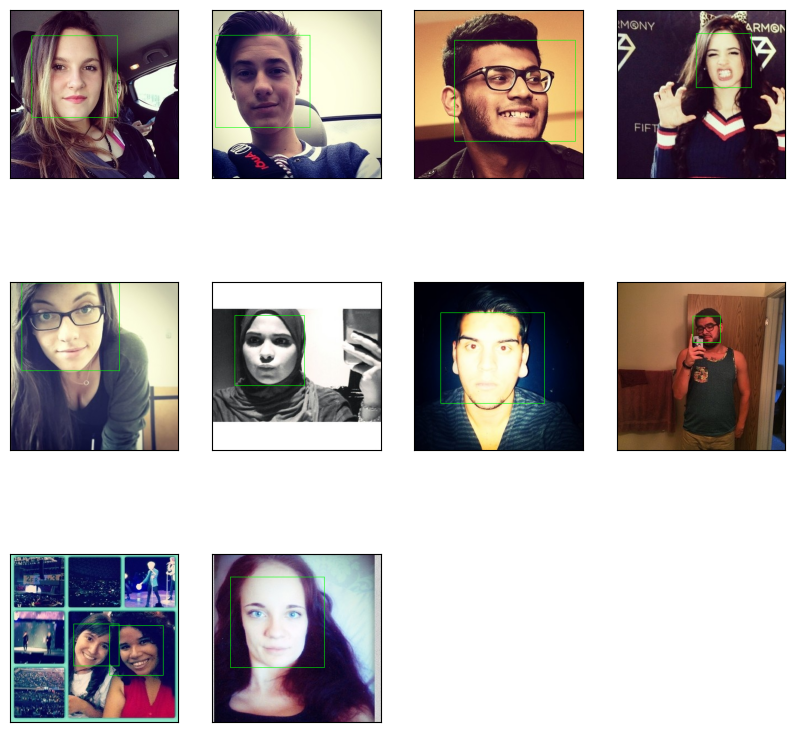

In [15]:
images, labels = load_data()

image_with_box = []

model_path = "./runs/detect/train7/weights/best.pt"
best_model = YOLO(model_path)

for i, l in zip(images, labels):
    
    # detect the faces from the images
    pred = best_model(i, verbose=False)

    for coordinates in pred[0].boxes.data:
        x1, y1, x2, y2, _, __ = coordinates.cpu().numpy()
        i = draw_bounding_box(i, ([[np.uint(x1), np.uint(y1), np.uint(x2), np.uint(y2)]]))
    
    image_with_box.append(i)
    
plt.figure(figsize=(10,10))
plot_images(image_with_box)
    

In [14]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

while True:
    
    ret, frame = cap.read()

    if not ret:
        print("Error: Could not retrieve frame.")
        break

    # detect the face from the frame
    pred = best_model(frame, verbose=False)
    
    # if frame is detected draw the bounding boxes
    if pred:
        
        for coordinates in pred[0].boxes.data:
            x1, y1, x2, y2, _, __ = coordinates.cpu().numpy()
            frame = draw_bounding_box(frame, ([[np.uint(x1), np.uint(y1), np.uint(x2), np.uint(y2)]]))
    
    cv2.imshow('Camera', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [14]:
cap.release()
cv2.destroyAllWindows()